In [ ]:
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/...
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
!apt install cm-super

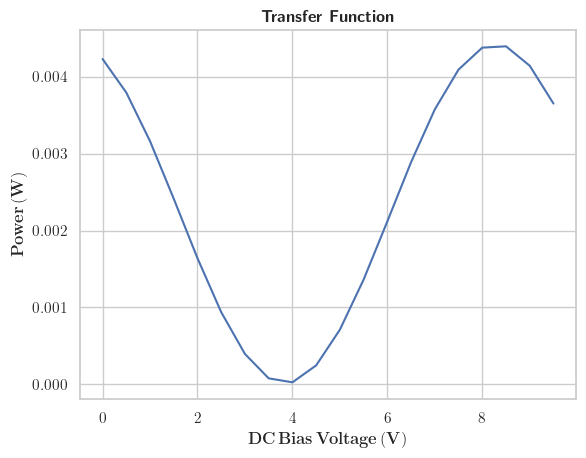

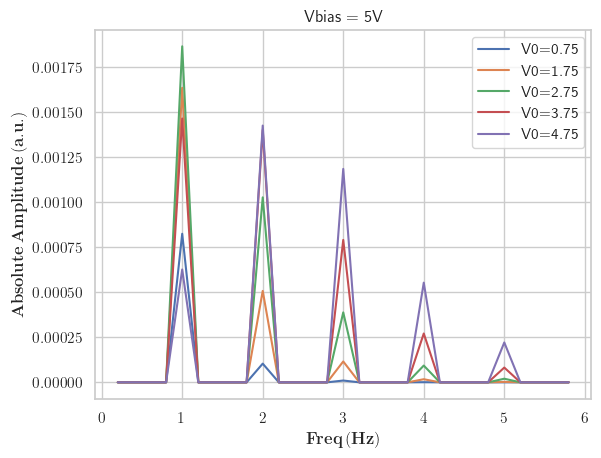

In [3]:
from scipy.fft import fft, fftfreq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pylab import *
import glob
import csv
mpl.rcParams['text.usetex'] = True
sns.set(style="white", rc={"axes.facecolor": "#f3f3f3", "grid.color": "#cccccc"})
sns.set_context("notebook", rc={"font.size": 14, "axes.titlesize": 16, "axes.labelsize": 14})

sns.set(style="whitegrid")  # or style="ticks"
Vbias=5

t=np.arange(0,5,0.001)
x=np.arange(0,10,0.5)
fig2 = plt.figure()
J=0.000014+(0.00442-0.000014)*(np.cos(0.354*x+0.21))**2

ax1 = fig2.add_subplot(1,1,1)
ax1.set_xlabel(r"$\mathbf{DC\, Bias\,Voltage \,(V)}$")
ax1.set_ylabel(r"$\mathbf{Power \,(W)}$")
ax1.set_title(label = r"\textbf{Transfer Function}")
ax1.plot(x,J)

N=5000
T=0.001
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r"$\mathbf{Freq \,(Hz)}$")
ax.set_ylabel(r"$\mathbf{Absolute \,Amplitude \,(a.u.)}$")
ax.set_title(label = f"Vbias = {Vbias}V")
for i in range(0,5,1):
  RF=np.sin(2*np.pi*t)
  V0=1*i+0.75
  V=np.cos(0.354*(Vbias+V0*RF)+0.21)

  P=0.000014+(0.00442-0.000014)*V**2
  yf = fft(P)
  xf = fftfreq(N, T)[:N//2][1:30]
  ax.plot(xf,2.0/N * np.abs(yf[0:N//2][1:30]),label=f"V0={V0}")

ax.legend(loc='upper right', ncol=1, fancybox=True)
plt.savefig("Class Result.pdf")


